In [2]:
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

In [7]:
tiempos=np.loadtxt('data.csv')

#conversion de milisegundos a segundos 
tiempos/=100
#print 'tiempos [s]: ',tiempos

#calculo de las velocidades

gravedad=2.0*2.0/(tiempos*tiempos)

#print 'velocidad [m/s]: ',velocidad

mediag = np.mean(gravedad) # Comando directo de python
devstdg = np.std(gravedad)
clasesg = int(np.sqrt(gravedad.size))

histg, binsg = np.histogram(gravedad,bins=clasesg)

print('El promedio de la velocidad es %.3f m/s' % mediag)
print('La desviación estándar de la velocidad es %.3f m/s' %devstdg)
print '------------------------------------------------------'
print histg
print binsg

El promedio de la velocidad es 21.469 m/s
La desviación estándar de la velocidad es 8.192 m/s
------------------------------------------------------
[11 14  2  1  2]
[ 10.07810532  17.57496939  25.07183346  32.56869754  40.06556161
  47.56242568]


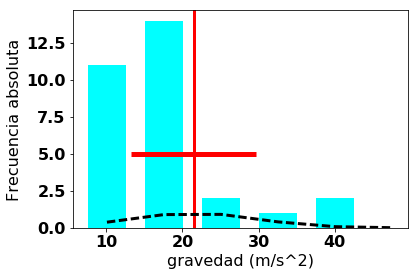

In [10]:
# Medidas de longitud
plt.subplot(1,1,1)
plt.bar(binsg[0:5],histg,width=5,color='cyan')
plt.axvline(mediag,linewidth=3, c="red")
plt.plot([mediag-devstdg, mediag+devstdg], [5, 5], linewidth=5, linestyle="-", color="red",
         solid_capstyle="butt")


fg = np.exp(-(binsg-mediag)**2/(2*devstdg**2))
plt.plot(binsg, fg, 'k--', linewidth=3)
plt.xlabel('gravedad (m/s^2)')
plt.ylabel('Frecuencia absoluta')

plt.show()

In [25]:
#datos experimentales
incerteza = 0.001
acelT = 977. # aceleración teórica en Medellín m/s^2
dist = 200. # altura en m
datost = np.array(tiempos[10:15]) # tiempo en segundos
acel = 2*dist/datost**2 # Aceleraciones experimentales

aux = stats.t.interval(1-incerteza,5-1,loc=0,scale=1)
valor_t = aux[1] # corrección de t-student
acelP = np.mean(acel) # Aceleración promedio
acelSTD = np.sqrt(np.var(acel,ddof=1)) # Desv estándar de la muestra
error = valor_t*acelSTD/np.sqrt(datost.size)

print('La aceleración de la gravedad teórica es %.f m/s^2' %acelT)
print('La aceleración experimental con una incerteza del %.2f porciento es %.f +/- %.f en m/s^2' % (incerteza*100,acelP,error))
print('Es decir, en el intervalo (%.f , %.f) m/s^2' % (acelP-error,acelP+error))
print('valor t = %.4f ' %valor_t)
#print datost.size

La aceleración de la gravedad teórica es 977 m/s^2
La aceleración experimental con una incerteza del 0.10 porciento es 1640 +/- 1665 en m/s^2
Es decir, en el intervalo (-26 , 3305) m/s^2
valor t = 8.6103 


In [24]:
# tres sigma
error3s =  3.0*acelSTD/np.sqrt(datost.size)
print('El error considerando 3 sigma está en el intervalo (%.f , %.f) cm/s^2' % (acelP-error3s,acelP+error3s))

El error considerando 3 sigma está en el intervalo (786 , 5064) cm/s^2
